<IPython.core.display.Javascript object>


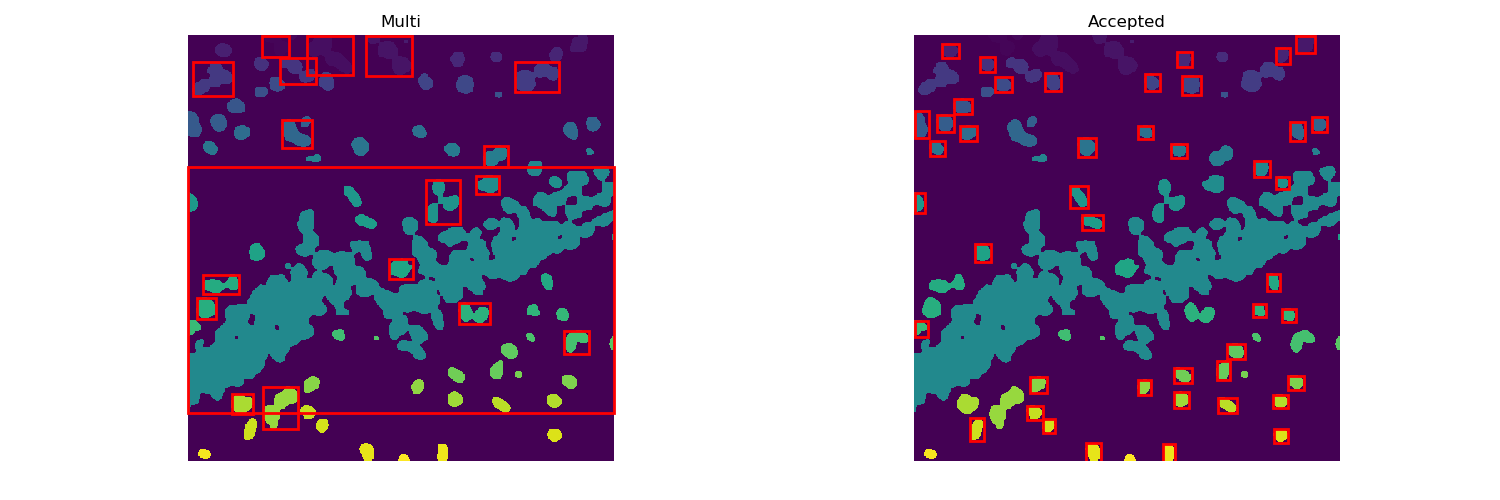

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


import mahotas as mh

from skimage import io
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, opening, square
from skimage.color import label2rgb, rgb2gray

# apply threshold

dapi_path = "/media/ula/D/adam_catfish/catfish_dapi_tst.gif"
image = io.imread(dapi_path)
#image = color.rgb2gray(image)

image = mh.gaussian_filter(image, 2.)
T_mean = image.mean()
#bin_image = 


opened = opening(image > T_mean, square(3))
bw = closing(opened, square(3))

# remove artifacts connected to image border
#cleared = clear_border(bw)


# label image regions
label_image = label(bw)


fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(label_image)
ax[0].set_title("Multi")
ax[1].imshow(label_image)
ax[1].set_title("Accepted")

areas = np.array([])
regions_to_reconsider = []

for region in regionprops(label_image):
     # take regions with large enough areas
    areas = np.append(areas, region.area)

    
std = np.std(areas)
mean = np.mean(areas)

thresh_down = 180
thresh_up = 430
        
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        
     # take regions with large enough areas
    if region.area >= thresh_up:
        ax[0].add_patch(rect)
        regions_to_reconsider = np.append(regions_to_reconsider, region)
    elif region.area >= thresh_down:
#        # draw rectangle around segmented coins        
        ax[1].add_patch(rect)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [2]:
def get_frac_thresh(arr, frac):
    min_lum = np.min(arr)
    max_lum = np.max(arr)
    return min_lum + frac*(max_lum - min_lum)

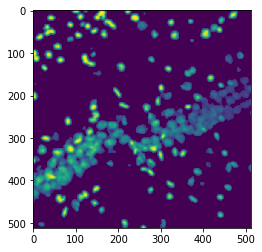

In [3]:
background_thresh = get_frac_thresh(image, 0.1)
mask = image < background_thresh
masked = np.ma.masked_array(data = image, mask = mask,fill_value = 0)

plt.imshow(masked.filled())
plt.show()

In [4]:
for region in regionprops(label_image):
    if region not in regions_to_reconsider:
        for xy in region.coords:
            mask[xy[0]][xy[1]] = True

<IPython.core.display.Javascript object>


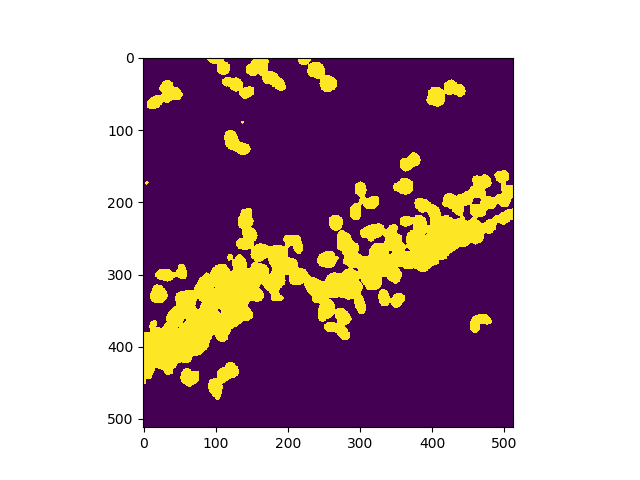

In [16]:
masked = np.ma.masked_array(data = image, mask = mask,fill_value = 0)

multiple = masked.filled()
multiple = opening(multiple)
multiple = multiple > 0

plt.imshow(multiple)
plt.show()

<IPython.core.display.Javascript object>


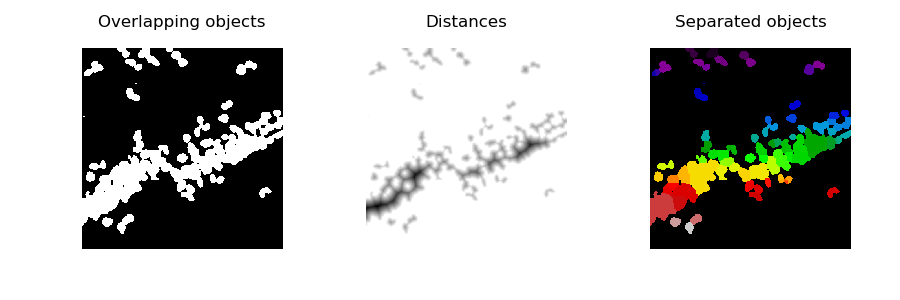

In [21]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(multiple)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((20,20)),
                            labels=multiple)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=multiple)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(multiple, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


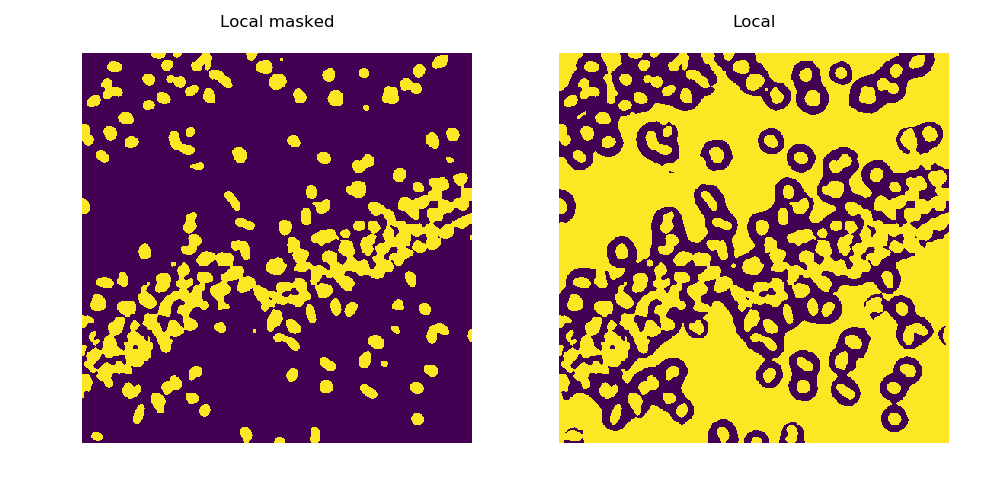

In [31]:
from skimage.filters import threshold_local

local_thresh = threshold_local(image, 51, offset=7)
binary_local = image > local_thresh

local_masked_global = np.ma.masked_array(data = binary_local, mask = ~bw, fill_value = 0).filled()

fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(local_masked_global)
ax[0].set_title("Local masked")
ax[1].imshow(binary_local)
ax[1].set_title("Local")


for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
distance = ndi.distance_transform_edt(local_masked_global)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((20,15)),
                            labels=local_masked_global)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=local_masked_global)

label_image = label(labels, connectivity = 1)


fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(label_image)
ax[0].set_title("Multi")
ax[1].imshow(label_image)
ax[1].set_title("Accepted")

areas = np.array([])
regions_to_reconsider = []

for region in regionprops(label_image):
     # take regions with large enough areas
    areas = np.append(areas, region.area)

    
std = np.std(areas)
mean = np.mean(areas)

thresh_down = 0
thresh_up = 1000
        
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        
     # take regions with large enough areas
    if region.area >= thresh_up:
        ax[0].add_patch(rect)
        regions_to_reconsider = np.append(regions_to_reconsider, region)
    elif region.area >= thresh_down:
#        # draw rectangle around segmented coins        
        ax[1].add_patch(rect)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
labels.ndim